### bibliotecas


In [79]:
import numpy as np 
import pandas as pd 
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%pip install plotly
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.graph_objs as go
import collections
from collections import defaultdict

In [39]:
%pip install textblob
from textblob import TextBlob
%pip install wordcloud
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Importando os arquivos

In [40]:
df_trump = pd.read_csv('../BD/hashtag_donaldtrump.csv', lineterminator='\n') 
df_biden = pd.read_csv('../BD/hashtag_joebiden.csv', lineterminator='\n')

### Entendo os dados Trump


In [5]:
df_trump.head(3)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060


In [6]:
df_trump.shape 

(970919, 21)

In [7]:
df_trump.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,9.709190e+05,970919.000000,970919.000000,9.709190e+05,9.709190e+05,445719.000000,445719.000000
mean,1.322494e+18,7.477011,1.698500,4.468311e+17,2.260357e+04,35.697936,-40.369638
std,2.555133e+15,158.058117,40.028419,5.544702e+17,3.042152e+05,18.823129,67.531751
min,1.316529e+18,0.000000,0.000000,5.310000e+02,0.000000e+00,-90.000000,-175.202642
25%,1.320478e+18,0.000000,0.000000,2.169326e+08,7.700000e+01,32.701939,-96.796856
50%,1.323612e+18,0.000000,0.000000,2.373392e+09,4.410000e+02,39.783730,-74.006015
75%,1.324505e+18,1.000000,0.000000,1.078344e+18,2.066000e+03,46.603354,6.776314
max,1.325589e+18,74084.000000,20491.000000,1.325581e+18,1.911533e+07,90.000000,179.048837


In [8]:
df_trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

### Entendendo os dados Biden

In [9]:
df_biden.head(3)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566


In [10]:
df_biden.shape

(776886, 21)

In [11]:
df_biden.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,7.768860e+05,776886.000000,776886.000000,7.768860e+05,7.768860e+05,355293.000000,355293.000000
mean,1.322844e+18,10.161164,2.131331,4.532033e+17,2.884994e+04,35.104203,-41.979660
std,2.585560e+15,390.974423,96.661527,5.573483e+17,4.141085e+05,17.907910,67.823724
min,1.316529e+18,0.000000,0.000000,1.081000e+03,0.000000e+00,-79.406307,-172.120051
25%,1.320870e+18,0.000000,0.000000,2.257285e+08,7.400000e+01,31.816038,-97.268406
50%,1.323899e+18,0.000000,0.000000,2.464208e+09,4.280000e+02,39.783730,-74.006015
75%,1.325115e+18,2.000000,0.000000,1.088044e+18,2.081000e+03,43.653482,5.966069
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


In [12]:
df_biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

### Breve analise


In [13]:
# Adiciona uma nova coluna para diferenciar os tweets Trump e Biden 
df_trump["Candidate"] = "TRUMP"
df_biden["Candidate"] = "BIDEN"

In [14]:
Data_Mixed = pd.concat([df_trump,df_biden]) 
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head(3)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP


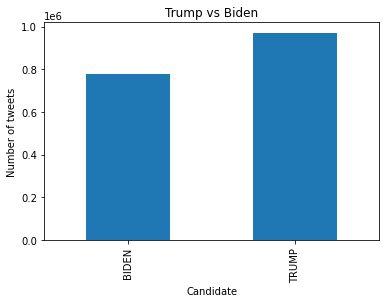

In [15]:
# Total de Tweets para cada candidato
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.show()

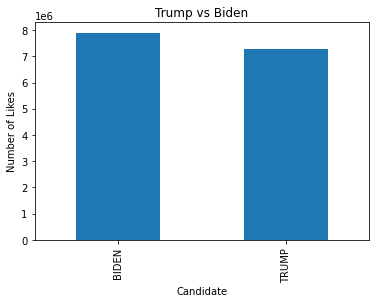

In [16]:
# Total de likes para cada candidato
Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.ylabel('Number of Likes')
plt.title('Trump vs Biden')
plt.show()

#Embora o número de tweets para 
#Trump seja alto, mas o número de curtidas é alto para BIDEN, 
#mostrando que há mais conversa sobre Biden do que Trump

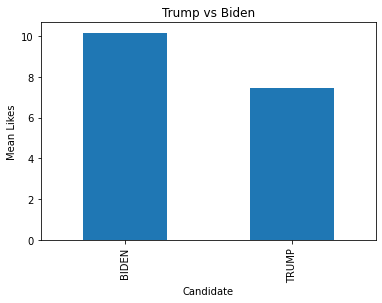

In [17]:
# Média de likes para cada candidato
Data_Mixed.groupby('Candidate')['likes'].mean().plot.bar()
plt.ylabel('Mean Likes')
plt.title('Trump vs Biden')
plt.show()

In [18]:
# renomeia para US tudo que for Estados Unidos
Data_Mixed['country']=Data_Mixed['country'].replace({"United States of America" : "US", "United States" : "US"})

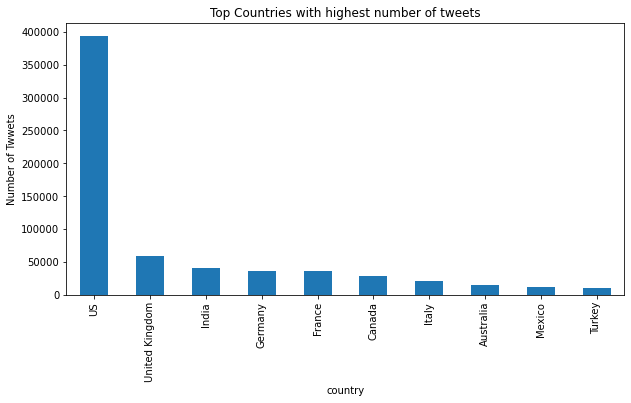

In [19]:
# Paises com a maior quantidade de tweets 
plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Twwets')
plt.title('Top Countries with highest number of tweets')
plt.show()

# Como esperado, mais Tweets são dos EUA, pois as eleições estão sendo realizadas lá

In [20]:
# Lista top 10 dos países com mais tweets 
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [21]:
# Tweets por Biden e Trump em cada país
tweet_df = Data_Mixed.groupby(['country','Candidate'])['tweet'].count().reset_index()

tweet_df = tweet_df[tweet_df['country'].isin(top10Countries)]

tweet_df

,country,Candidate,tweet
16,Australia,BIDEN,5534
17,Australia,TRUMP,9365
54,Canada,BIDEN,10809
55,Canada,TRUMP,16996
112,France,BIDEN,14610
113,France,TRUMP,20689
118,Germany,BIDEN,12761
119,Germany,TRUMP,22618
146,India,BIDEN,21532
147,India,TRUMP,18559


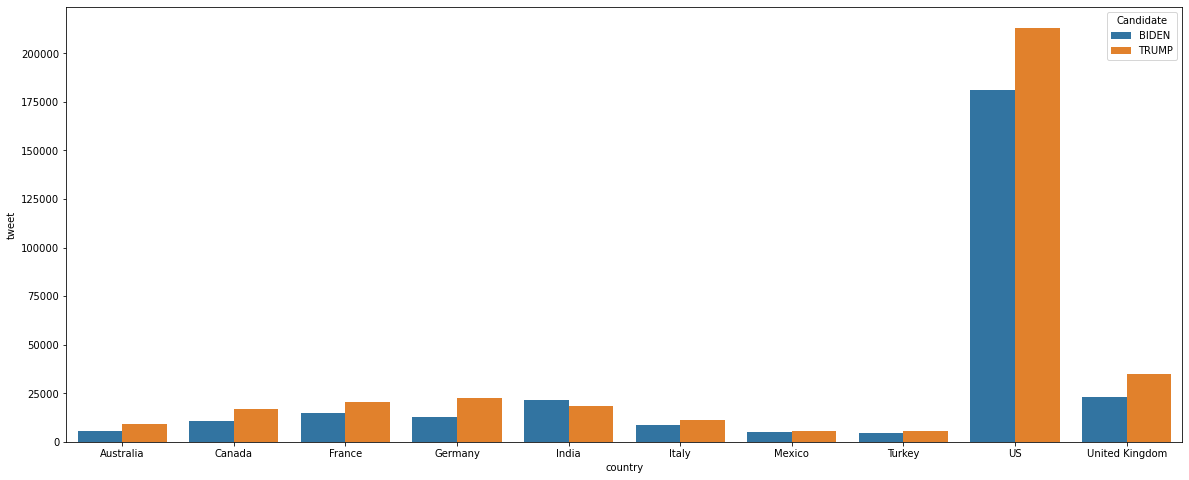

In [22]:
#Top 10 top 10 dos países com mais tweets por Trump a Biden
plt.figure(figsize=(20,8))
sns.barplot(data=tweet_df,x='country',y='tweet',hue='Candidate')
plt.show()


#Exceto na Índia A maioria dos países tuíta mais sobre Trump

In [23]:
# Lista dos 10 estados com maior numero de tweets 
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [24]:
# Tweets por Biden e Trump em cada estado
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().reset_index()

state_df = state_df[state_df['state'].isin(top10States)]

state_df

,state,Candidate,tweet
206,California,BIDEN,25817
207,California,TRUMP,31149
349,District of Columbia,BIDEN,7055
350,District of Columbia,TRUMP,9684
386,England,BIDEN,16743
387,England,TRUMP,24111
410,Florida,BIDEN,13284
411,Florida,TRUMP,16568
518,Ile-de-France,BIDEN,7001
519,Ile-de-France,TRUMP,9393


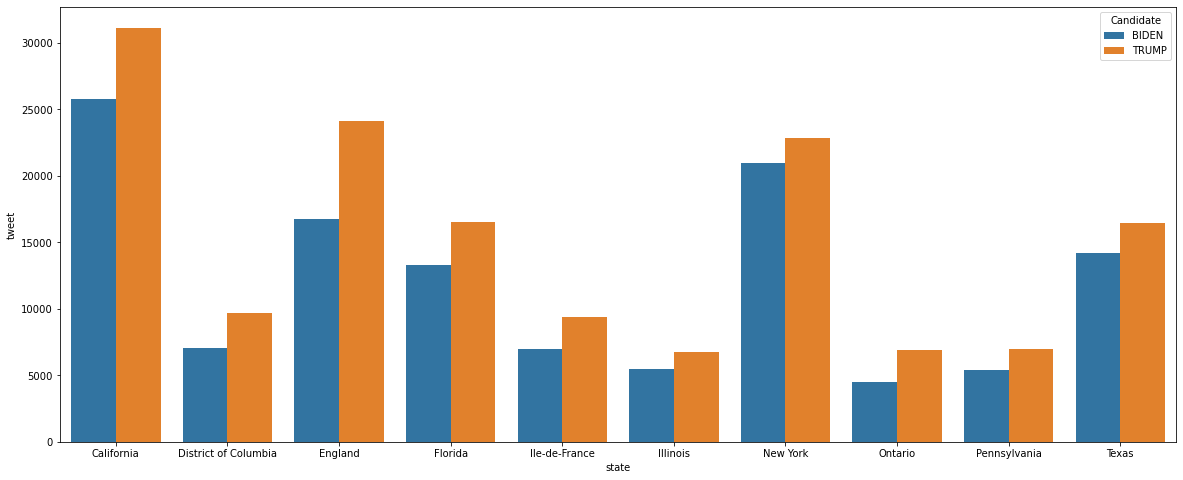

In [25]:
#Top 10 cidades que mais tem Tweet 
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

#Mesmo aqui os tweets são mais para Trump do que para Biden

In [26]:
state_df = Data_Mixed[Data_Mixed['country'] == 'US'].dropna(subset=['state_code']).groupby(['state_code','Candidate'])['tweet'].count().reset_index()
state_df = state_df.set_index(['Candidate', 'state_code']).unstack(level=0)

def getDiff(state):
    total = state[1] + state[0]
    diff = state[1] - state[0]  # trump - biden
    
    return diff/total

state_df = state_df.apply(getDiff, axis=1).reset_index().rename({0: 'diff'}, axis=1)

In [36]:
fig = px.choropleth(state_df,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='diff',
                    color_continuous_scale=('#4040ff', '#ff4040'),
                    range_color=(-0.1,0.1),
                    color_continuous_midpoint=0,
                    )
fig.show()

# https://plotly.com/python/choropleth-maps/
#   https://asimov.academy/criando-mapas-interativos-com-python/

### Analisando o sentimento nos tweets 

In [47]:
trump = df_trump[["user_id","tweet"]]
trump.head(2)

,user_id,tweet
0,360666534.0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
1,331617619.0,"Usa 2020, Trump contro Facebook e Twitter: cop..."


In [49]:
biden = df_biden[["user_id","tweet"]]
biden.head(2)

,user_id,tweet
0,360666534.0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
1,809904438.0,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...


In [57]:
# https://textblob.readthedocs.io/en/dev/quickstart.html#create-a-textblob
# Aqui vou usar este pacote para realizar a classificação de texto simples em positivo ou negativo com base na análise de sentimentos

#teste
textblob1 = TextBlob(trump["tweet"][10])
print("Trump :",textblob1.sentiment)

textblob2 = TextBlob(biden["tweet"][500])
print("Biden :",textblob2.sentiment)

Trump : Sentiment(polarity=0.03958333333333334, subjectivity=0.9666666666666667)
Biden : Sentiment(polarity=-0.5208333333333333, subjectivity=0.6666666666666666)


A polaridade  varia de -1 a +1 (negativo a positivo) e informa se o texto tem sentimentos negativos ou positivos. A polaridade fala sobre informações factuais.

In [59]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity


trump["Sentiment Polarity"] = trump["tweet"].apply(find_pol)
print(trump.tail())

biden["Sentiment Polarity"] = biden["tweet"].apply(find_pol)
print(biden.tail())


<ipython-input-59-209299c39848>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



             user_id                                              tweet  \
970914  3.427951e+09  @PelleX @Mikerger @spiegelbilderz_ @BertiFranz...   
970915  3.245258e+09  JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...   
970916  9.866108e+17  #AfD|ler reagieren panisch bis hysterisch auf ...   
970917  7.687811e+08  @sammelbis1998 @iheartmindy @bnorthg First, yo...   
970918  4.519791e+08  OK just had to do it !\n#Trump #CatapultTrump ...   

        Sentiment Polarity  
970914            0.000000  
970915           -0.150000  
970916            0.000000  
970917            0.130556  
970918            0.625000  
             user_id                                              tweet  \
776881  3.873620e+08  Stop laying @CNN !\n#Paris and #London dont gi...   
776882  4.032819e+08  Ωχ ελπίζω να μη μας βγει  σαν τους οπαδούς του...   
776883  7.819183e+17  L'OTAN va sortir de sa léthargie et redevenir ...   
776884  5.293315e+08  🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...   


<ipython-input-59-209299c39848>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Polaridade do sentimento em ambos os candidatos:

In [62]:
trump["Expression Label"] = np.where(trump["Sentiment Polarity"]>0, "positive", "negative")
trump["Expression Label"][trump["Sentiment Polarity"]==0]="Neutral"
print(trump.tail())


biden["Expression Label"] = np.where(biden["Sentiment Polarity"]>0, "positive", "negative")
biden["Expression Label"][biden["Sentiment Polarity"]==0]="Neutral"
print(biden.tail())

<ipython-input-62-987f2e50bb37>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-987f2e50bb37>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\naiar\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-987f2e50bb37>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a

             user_id                                              tweet  \
970914  3.427951e+09  @PelleX @Mikerger @spiegelbilderz_ @BertiFranz...   
970915  3.245258e+09  JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...   
970916  9.866108e+17  #AfD|ler reagieren panisch bis hysterisch auf ...   
970917  7.687811e+08  @sammelbis1998 @iheartmindy @bnorthg First, yo...   
970918  4.519791e+08  OK just had to do it !\n#Trump #CatapultTrump ...   

        Sentiment Polarity Expression Label  
970914            0.000000          Neutral  
970915           -0.150000         negative  
970916            0.000000          Neutral  
970917            0.130556         positive  
970918            0.625000         positive  
             user_id                                              tweet  \
776881  3.873620e+08  Stop laying @CNN !\n#Paris and #London dont gi...   
776882  4.032819e+08  Ωχ ελπίζω να μη μας βγει  σαν τους οπαδούς του...   
776883  7.819183e+17  L'OTAN va sortir de sa lét

<ipython-input-62-987f2e50bb37>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\naiar\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
# descartando todos os tweets com polaridade neutra de ambos os conjuntos de dados para equilibrar os dados igualmente. 

reviews1= trump[trump['Sentiment Polarity'] == 0.0000]
print(reviews1.shape)

cond1= trump['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
trump.drop(trump[cond1].index, inplace = True)
print(trump.shape)

reviews2= biden[biden['Sentiment Polarity'] == 0.0000]
print(reviews2.shape)

cond2= biden['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden.drop(biden[cond2].index, inplace = True)
print(biden.shape)


(0, 4)
(438738, 4)
(440554, 4)
(776886, 4)


C:\Users\naiar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\naiar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
# Donald Trump
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(trump.index, remove_n, replace=False)
df_subset_trump = trump.drop(drop_indices)
print(df_subset_trump.shape)


# Joe Biden
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(biden.index, remove_n, replace=False)
df_subset_biden = biden.drop(drop_indices)
print(df_subset_biden.shape)

(438414, 4)
(776855, 4)


In [68]:

# analisando os dados para prever as eleições dos EUA, analisando o número de sentimentos positivos e negativos em ambas as contas:


count_1 = df_subset_trump.groupby('Expression Label').count()
print(count_1)

negative_per1 = (count_1['Sentiment Polarity'][0]/1000)*10
positive_per1 = (count_1['Sentiment Polarity'][1]/1000)*100

count_2 = df_subset_biden.groupby('Expression Label').count()
print(count_2)

negative_per2 = (count_2['Sentiment Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment Polarity'][1]/1000)*100

Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

                  user_id   tweet  Sentiment Polarity
Expression Label                                     
negative           161168  161168              161168
positive           277246  277246              277246
                  user_id   tweet  Sentiment Polarity
Expression Label                                     
Neutral            440537  440537              440537
negative            98118   98118               98118
positive           238200  238200              238200
